# 📘 **Guía para la Visualización de Resultados en K-Nearest Neighbors (KNN) con Python, Scikit-learn, Matplotlib y Seaborn**

---

### **Aplicaciones en Machine Learning y Educación en Ingeniería de Datos**

---

<div align="center">

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" alt="Python Logo" width="120"/>
&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="Scikit-learn Logo" width="120"/>
&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://matplotlib.org/_static/images/logo2.svg" alt="Matplotlib Logo" width="120"/>
<img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" alt="Seaborn Logo" width="200"/>

</div>

---

### 👨‍🏫 **Autores:**  
**Carlos Andrés Tamayo Benjumea**  
Ingeniero de Sistemas | Docente Universitario  
**José Javier Coronel Casadiego**  
Ingeniero de Sistemas | Especialista en Docencia Universitaria | Docente Universitario  

---

### 🛠️ **Herramientas Utilizadas:**  
- Python  
- Google Colab  
- Scikit-learn  
- Matplotlib  
- Seaborn

---

### 🎯 **Propósito:**  
Desarrollar y visualizar modelos de **K-Nearest Neighbors (KNN)** para clasificación supervisada mediante herramientas de Python, aplicando buenas prácticas didácticas para su uso en ingeniería, análisis de datos y educación en machine learning.

---

### 📅 **Fecha:**  
22 de Julio de 2025  

---


# 📒 Clasificación con K-Nearest Neighbors (KNN) en Machine Learning  
## Guía paso a paso con Python, Scikit-learn, Classification Report y Matriz de Confusión  

🎯 **Objetivo:**  
Desarrollar un ejemplo completo y didáctico para entrenar, evaluar e interpretar un modelo de **K-Nearest Neighbors (KNN)** aplicado a tareas de clasificación supervisada utilizando `Scikit-learn`.  
El proceso incluirá la correcta división de datos, el escalado necesario para este tipo de modelo, la evaluación mediante métricas como **Accuracy** y **Classification Report**, y la interpretación gráfica mediante la **Matriz de Confusión**.


## 📍 Introducción a K-Nearest Neighbors (KNN)

El algoritmo **K-Nearest Neighbors (KNN)** es un método de clasificación supervisado que predice la clase de una nueva muestra basándose en las clases de sus **k vecinos más cercanos** en el espacio de características.

KNN es considerado un algoritmo **no paramétrico** y **basado en instancias**: no construye un modelo explícito, sino que almacena el conjunto de entrenamiento y toma decisiones al momento de realizar predicciones.

### **Características Principales:**
- Simple e intuitivo.
- No requiere un modelo explícito, solo calcula distancias.
- Sensible a la escala de las características (es recomendable estandarizar).
- Su rendimiento depende del valor de **k** y de la métrica de distancia utilizada.


# 📘 K-Nearest Neighbors (KNN) para Clasificación con Python y Scikit-learn (Wine Dataset)

## Aplicaciones en Educación, Ingeniería y Ciencia de Datos

Este notebook muestra de forma didáctica cómo implementar un modelo de **K-Nearest Neighbors (KNN)** para resolver un problema de **clasificación multiclase** utilizando el conjunto de datos **Wine**.  
Se aplican buenas prácticas de visualización, escalado, entrenamiento, evaluación e interpretación de resultados.


## 🔧 Librerías y Herramientas Utilizadas

- `pandas`: manipulación de datos tabulares
- `matplotlib`, `seaborn`: visualización gráfica
- `sklearn`: Machine Learning (Random Forest, métricas, datasets)

Estas librerías son fundamentales en proyectos de Machine Learning supervisado.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Cargar el dataset Wine
data = load_wine(as_frame=True)
X = data.data
y = data.target
df = data.frame

# Ver las primeras filas
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# Información básica sobre el dataset
print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

🔍 El dataset **Wine** contiene 13 características químicas obtenidas a partir de muestras de vino.  
El objetivo es clasificar el vino en **tres tipos** distintos según la región de cultivo.

Este conjunto de datos es ampliamente utilizado como referencia en clasificación multiclase.


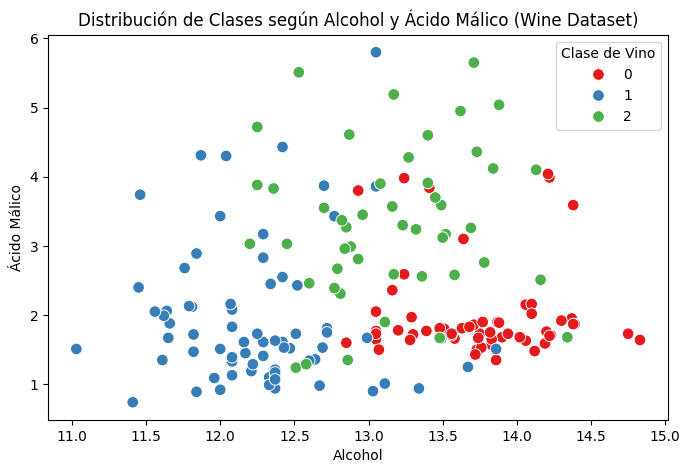

In [3]:
# Visualizamos dos características para ver la separación entre clases
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df["alcohol"],
    y=df["malic_acid"],
    hue=df["target"],
    palette="Set1",
    s=70
)
plt.title("Distribución de Clases según Alcohol y Ácido Málico (Wine Dataset)")
plt.xlabel("Alcohol")
plt.ylabel("Ácido Málico")
plt.legend(title="Clase de Vino")
plt.show()


🔍 Esta visualización permite observar si existen patrones visuales entre características que favorezcan la separación de las clases.


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


⚠️ **KNN es sensible a la escala de las características.**  
Por esta razón es fundamental estandarizar los datos antes de entrenar el modelo.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print(f"🔹 Tamaño de entrenamiento: {X_train.shape}")
print(f"🔹 Tamaño de prueba: {X_test.shape}")


🔹 Tamaño de entrenamiento: (124, 13)
🔹 Tamaño de prueba: (54, 13)


### 📑 División de los datos

Hemos dividido el conjunto de datos en dos subconjuntos:
- **70% para entrenamiento:** Se utiliza para que el modelo aprenda los patrones presentes en los datos.
- **30% para prueba:** Se reserva para evaluar la capacidad del modelo de generalizar y realizar predicciones sobre datos no vistos.

✅ Con esta división, estamos listos para entrenar nuestro modelo KNN.


In [6]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

🎯 Entrenamos un modelo **K-Nearest Neighbors (KNN)** con **k=5** vecinos.  
KNN clasifica una nueva muestra según la mayoría de clases presentes entre sus vecinos más cercanos.


In [8]:
y_pred = knn_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.9629629629629629

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


🔢 Confusion Matrix:
 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]


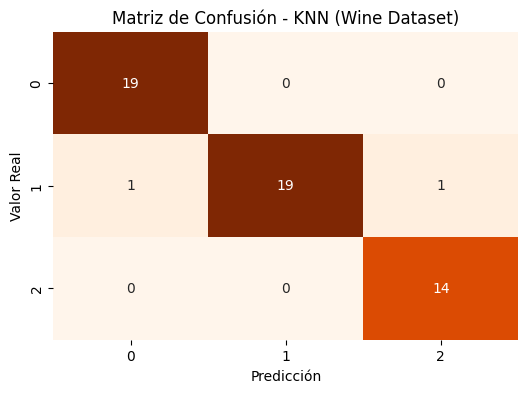

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - KNN (Wine Dataset)")
plt.show()


## 📝 Conclusiones

✔️ El modelo **K-Nearest Neighbors (KNN)** ha mostrado buen desempeño para la clasificación multiclase del dataset Wine.  
✔️ KNN destaca por su simplicidad y utilidad en problemas donde los datos bien escalados y la selección adecuada de **k** ofrecen buenos resultados.  
✔️ Su naturaleza basada en instancias lo hace sensible al ruido y menos escalable a grandes volúmenes de datos.  
✔️ Esta plantilla puede adaptarse fácilmente a otros problemas supervisados donde se busque comprender el impacto de la vecindad y las distancias en la clasificación.

---
